A) Regression Task

# Introduction

House Sales in King County, USA
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

#Data link
https://www.kaggle.com/harlfoxem/housesalesprediction

#Description of Data
https://storage.googleapis.com/kaggle-forum-message-attachments/479761/11440/Screenshot%202019-02-27%20at%205.26.24%20PM.png


# Import Data

In [1]:
import pandas as pd
df = pd.read_csv('kc_house_data.csv')

Preprocess data: 
    1)Explore data, 
    2)check for missing data 
    3)apply data scaling. Justify the type of scaling used.

# Data Exploration

In [2]:
#Looking at top 5 rows
df.head()

,id,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,lat,long
0,1000102.0,280000.0,20140916T000000,6.0,NaN,2400.0,9373.0,2.0,0.0,0.0,...,7.0,2400.0,0.0,1991.0,0.0,98002.0,2060.0,7316.0,47.3262,-122.214
1,1000102.0,300000.0,20150422T000000,6.0,NaN,2400.0,9373.0,2.0,0.0,0.0,...,7.0,2400.0,0.0,1991.0,0.0,98002.0,2060.0,7316.0,47.3262,-122.214
2,1200019.0,647500.0,20140508T000000,NaN,1.75,2060.0,26036.0,1.0,0.0,0.0,...,8.0,1160.0,900.0,1947.0,0.0,98166.0,2590.0,21891.0,47.4444,-122.351
3,1200021.0,400000.0,20140811T000000,3.0,1.00,NaN,43000.0,1.0,0.0,0.0,...,7.0,1460.0,0.0,1952.0,0.0,98166.0,2250.0,20023.0,47.4434,-122.347
4,2800031.0,235000.0,20150401T000000,3.0,1.00,NaN,7599.0,1.5,0.0,0.0,...,6.0,1010.0,420.0,1930.0,0.0,98168.0,1290.0,10320.0,47.4783,-122.265


In [3]:
#Looking at the shape of our data
df.shape

(21613, 21)

In [4]:
#Looking at our data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               20511 non-null float64
price            20511 non-null float64
date             20511 non-null object
bedrooms         20409 non-null float64
bathrooms        20211 non-null float64
sqft_living      20407 non-null float64
sqft_lot         20111 non-null float64
floors           20407 non-null float64
waterfront       19411 non-null float64
view             19911 non-null float64
condition        19411 non-null float64
grade            19407 non-null float64
sqft_above       20111 non-null float64
sqft_basement    20100 non-null float64
yr_built         20381 non-null float64
yr_renovated     20175 non-null float64
zipcode          20511 non-null float64
sqft_living15    20461 non-null float64
sqft_lot15       20455 non-null float64
lat              20010 non-null float64
long             20010 non-null float64
dtypes: float64(20), object(1)
memory usage: 3.5+ MB

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,lat,long
count,2.051100e+04,2.051100e+04,20409.000000,20211.000000,20407.000000,2.011100e+04,20407.000000,19411.000000,19911.000000,19411.000000,19407.000000,20111.000000,20100.000000,20381.000000,20175.000000,20511.000000,20461.000000,20455.000000,20010.000000,20010.000000
mean,4.581106e+09,5.408132e+05,3.369886,2.118265,2085.025775,1.516386e+04,1.497329,0.007161,0.234242,3.403534,7.667903,1790.553031,290.039154,1971.358079,82.600991,98077.972600,1986.551390,12696.247617,47.559896,-122.213799
std,2.877755e+09,3.679500e+05,0.930733,0.768549,920.260643,4.207190e+04,0.540826,0.084321,0.767414,0.649183,1.174873,829.910491,441.543924,29.374221,397.552904,53.473251,686.355818,26811.912210,0.138530,0.141124
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,47.155900,-122.519000
25%,2.123049e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.027000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98033.000000,1481.000000,5100.000000,47.470625,-122.329000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.600000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000,47.571500,-122.230000
75%,7.321405e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070150e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98118.000000,2363.000000,10080.000000,47.677600,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,858132.000000,47.777600,-121.315000


# Check and remove duplicated rows 

In [6]:
df[df.duplicated() == True].shape

(8, 21)

In [7]:
df = df.drop_duplicates(keep="last")
print(df.shape)

(21605, 21)


# Check for missing values

In [8]:
df.isna().sum()
#We can see 5% to 10% missing values

id               1094
price            1094
date             1094
bedrooms         1204
bathrooms        1402
sqft_living      1206
sqft_lot         1494
floors           1206
waterfront       2202
view             1702
condition        2202
grade            2206
sqft_above       1494
sqft_basement    1505
yr_built         1232
yr_renovated     1438
zipcode          1094
sqft_living15    1152
sqft_lot15       1158
lat              1595
long             1595
dtype: int64

# Data Cleaning and Imputation

#Drop insignificant variables

In [9]:
#Drop id and date column
df = df.drop(['id','date'] , axis=1)

In [10]:
#Remove rows with price(dependent variable) NA. 
df = df.dropna(subset =['price'])

In [11]:
#Check for missing values
df.isna().sum()

price               0
bedrooms         1204
bathrooms        1402
sqft_living      1206
sqft_lot          901
floors           1201
waterfront       2202
view             1702
condition        2202
grade            2206
sqft_above        901
sqft_basement     912
yr_built         1232
yr_renovated     1438
zipcode             0
sqft_living15    1151
sqft_lot15       1151
lat               501
long              501
dtype: int64

#Filling Missing value

In [12]:
#Fill Continous Features with mean. 
df['sqft_living'].fillna(df['sqft_lot'].mean(), inplace=True)
df['sqft_lot'].fillna(df['sqft_lot'].mean(), inplace=True)
df['sqft_above'].fillna(df['sqft_above'].mean(), inplace=True)
df['sqft_living15'].fillna(df['sqft_living15'].mean(), inplace=True)
df['sqft_lot15'].fillna(df['sqft_lot15'].mean(), inplace=True)


#Fill Categorical Features with Median
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
df['floors'].fillna(df['floors'].median(), inplace=True)
df['condition'].fillna(df['condition'].median(), inplace=True)
df['grade'].fillna(df['grade'].median(), inplace=True)
df['yr_built'].fillna(df['yr_built'].median(), inplace=True)
df['lat'].fillna(df['lat'].median(), inplace=True)
df['long'].fillna(df['long'].median(), inplace=True)


#Fill with 0 group. 
#These columns seem to be missing maybe because the house do not have such facilites therefore filling with mean/median/mode does not make sense here
df['waterfront'].fillna(0, inplace=True)
df['view'].fillna(0, inplace=True)
df['sqft_basement'].fillna(0, inplace=True)


#Fill yr_renovated with yr_built 
#If renovated year is missing it probably means it was never renovated.
df['yr_renovated'].fillna(df['yr_built'], inplace=True)


In [13]:
#Check for missing values
df.isna().sum()

#Now we have no missing values

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
lat              0
long             0
dtype: int64

# Data Visualization

Histogram of numerical variables

We can see price is right skewed this was expected as price has alot of expensive houses.
Many houses have no basement and lot size.
We can see few houses with 15000 sqft of living space which is very high and can ve treated as outliers.
Very few houses have been renovated and have been renovated in the year 2000

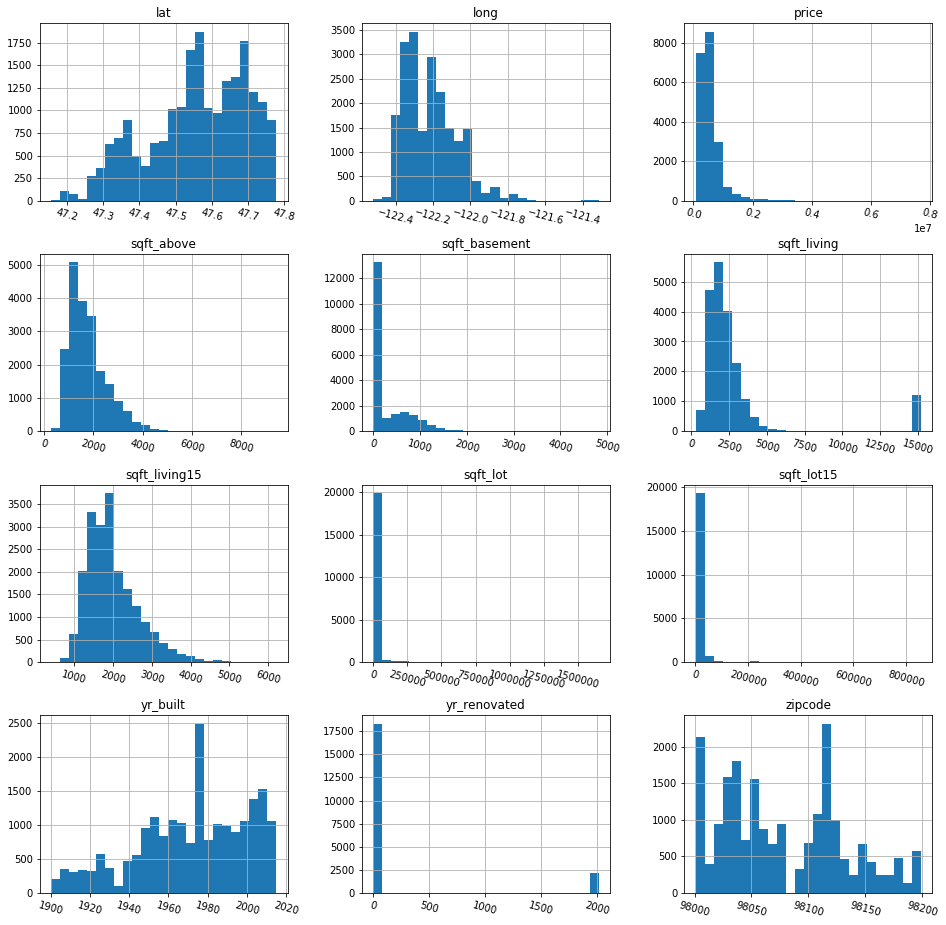

In [179]:
df1=df[['price', 'sqft_living',
    'sqft_lot','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

Boxplot of Ordinal features

From the boxplots we can see clear linear positive trend with our features such as number of bedrooms, floors, view, grade, bathrooms and waterfront

View and number of floors seem to have the least effect less but it has positive effect on price.

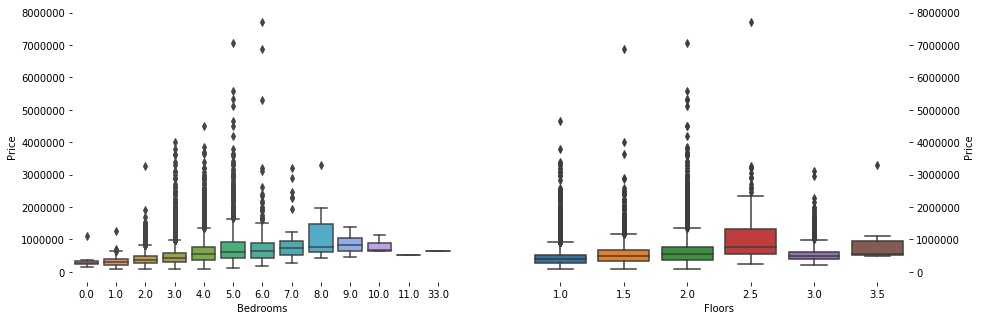

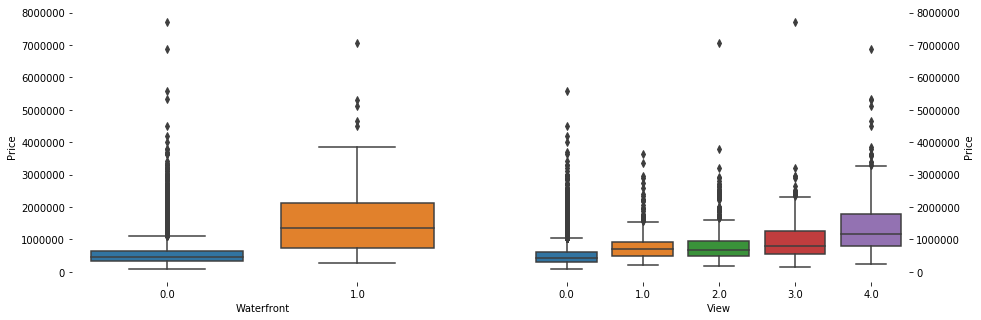

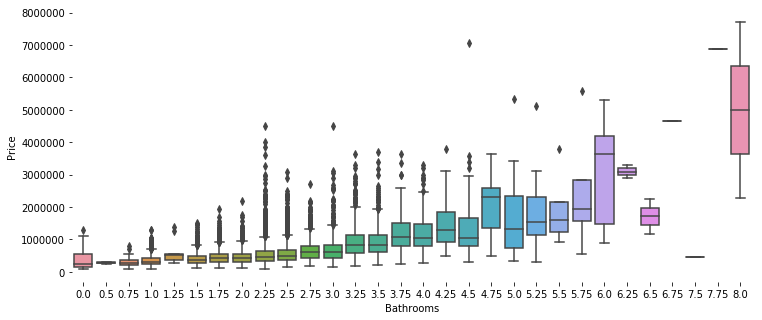

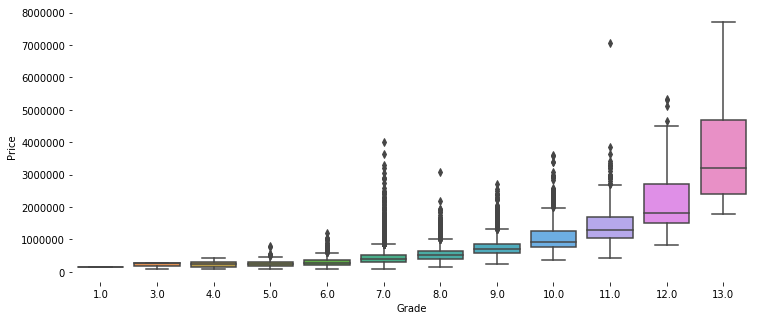

In [184]:
import seaborn as sns
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='View', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms', ylabel='Price');

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Grade', ylabel='Price');

# Check for Correlation

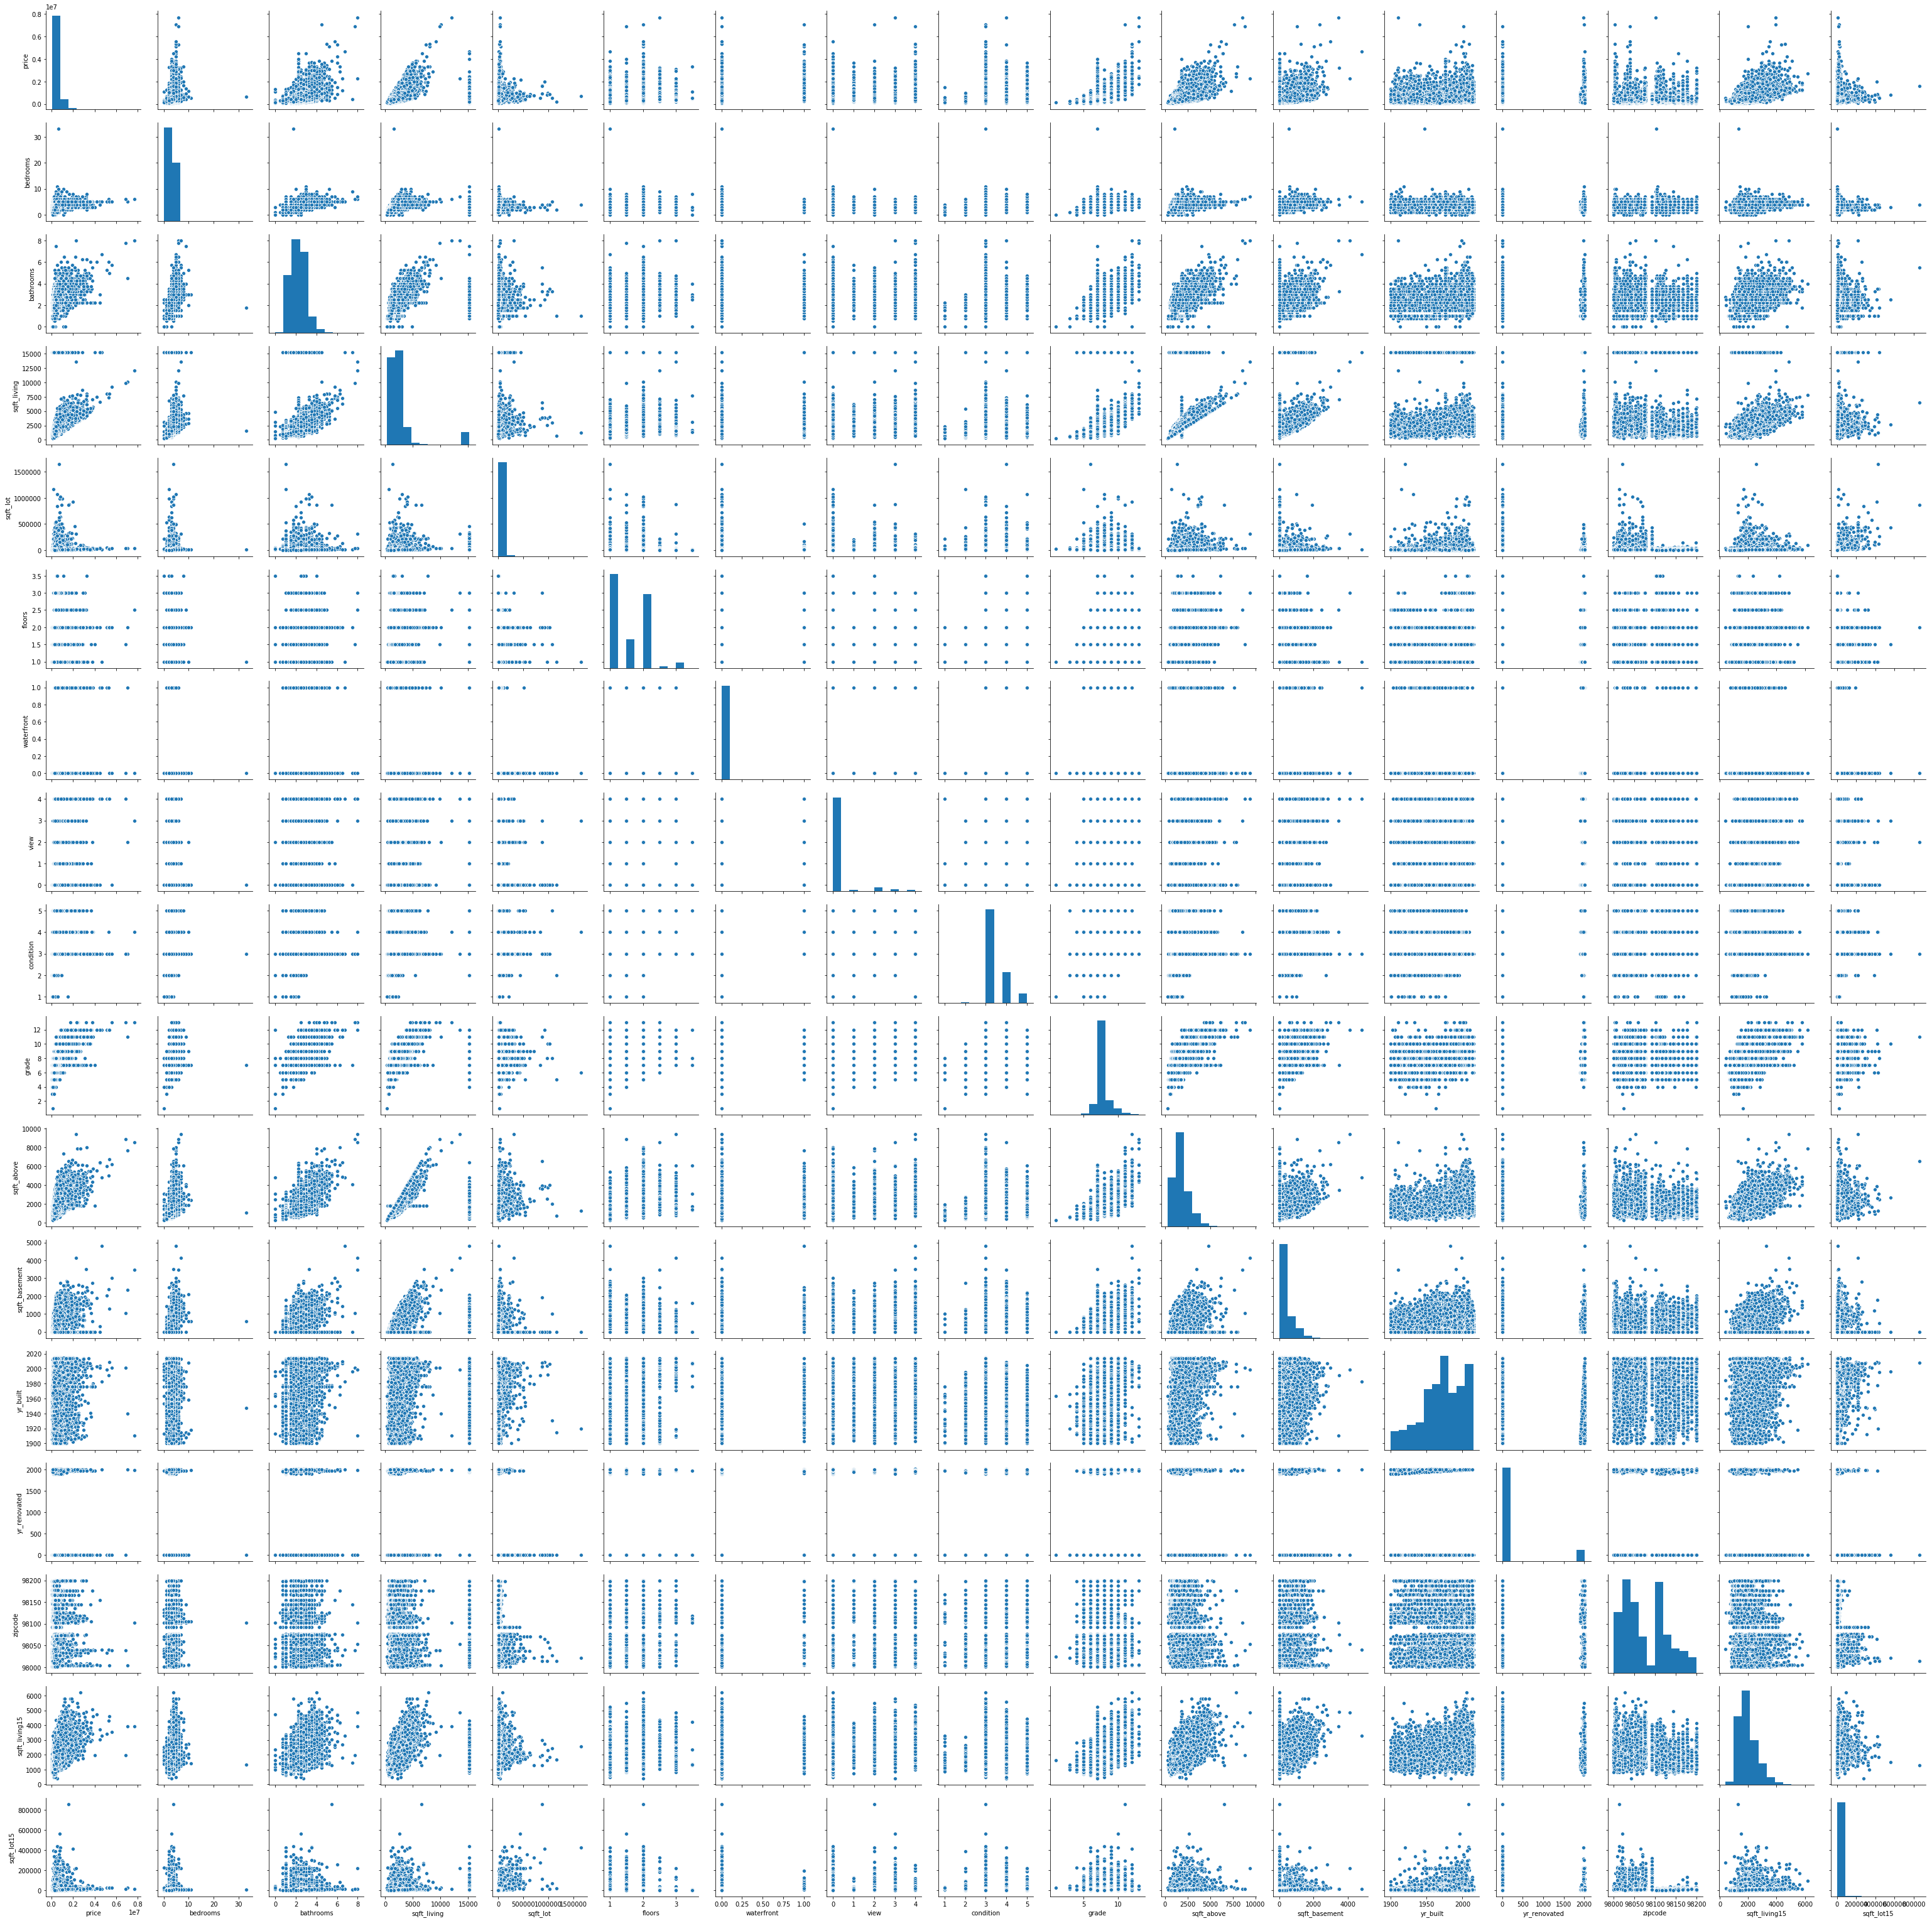

In [91]:
# Basic correlogram
import seaborn as sns
sns.pairplot(df)

We can see few highly corrleated variables
1)sqft_lot15 and sqft_lot(0.67)
2)sqft_living15 with sqft above(0.7)
3)sqft_living15 and grade(0.65)
5)sqft_above and grade (0.69)
6)sqft_above and bathrooms(0.65)
7)grade and bathrooms (0.6)

This information will be useful to drop variables after our regression analysis. If there is very high correlation between two features, keeping both of them is not a good idea most of the time not to cause overfitting. For instance, if there is overfitting, we may remove sqt_above or sqt_living because they are highly correlated. 
Thus, if a feature does not improve your model a lot, not adding it may be a better choice.

In [39]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,lat,long
price,1,0.3,0.51,0.17,0.088,0.25,0.24,0.38,0.031,0.62,0.59,0.31,0.057,0.082,-0.056,0.57,0.08,0.3,0.022
bedrooms,0.3,1,0.49,0.12,0.028,0.17,-0.016,0.072,0.021,0.33,0.46,0.28,0.15,-0.0028,-0.15,0.38,0.028,-0.0093,0.13
bathrooms,0.51,0.49,1,0.18,0.083,0.47,0.051,0.18,-0.12,0.6,0.65,0.26,0.48,0.011,-0.2,0.53,0.079,0.023,0.21
sqft_living,0.17,0.12,0.18,1,0.046,0.058,0.029,0.07,-0.012,0.15,0.21,0.095,0.052,0.08,-0.039,0.18,0.057,0.018,0.046
sqft_lot,0.088,0.028,0.083,0.046,1,-0.01,0.023,0.07,-0.0054,0.1,0.18,0.014,0.047,0.0073,-0.13,0.13,0.67,-0.084,0.22
floors,0.25,0.17,0.47,0.058,-0.01,1,0.022,0.029,-0.24,0.43,0.5,-0.24,0.48,-0.027,-0.058,0.28,-0.015,0.05,0.12
waterfront,0.24,-0.016,0.051,0.029,0.023,0.022,1,0.35,0.024,0.078,0.061,0.07,-0.023,0.059,0.019,0.077,0.031,-0.02,-0.038
view,0.38,0.072,0.18,0.07,0.07,0.029,0.35,1,0.041,0.21,0.16,0.26,-0.046,0.066,0.076,0.26,0.075,-0.00045,-0.071
condition,0.031,0.021,-0.12,-0.012,-0.0054,-0.24,0.024,0.041,1,-0.1,-0.14,0.15,-0.32,-0.014,0.002,-0.081,-0.0011,-0.011,-0.09
grade,0.62,0.33,0.6,0.15,0.1,0.43,0.078,0.21,-0.1,1,0.69,0.15,0.42,-0.012,-0.17,0.65,0.11,0.1,0.18


# Preprocessing Data

Selecting our features and target variables

In [14]:
#Selecting our features and target variables
X = df.drop(['price'],axis = 1 )
y = df['price']

Split the data into train and test dataset (80% - train and 20% - test)

In [15]:
#Split the data into train and test dataset (80% - train and 20% - test)

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

# Scaling the data

Scaling with min max as we have a alot of outliers it is best to scale entire dataset to end up with smaller standard deviations, which can suppress the effect of outliers.

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
print(linear_reg.score(X_train, y_train))
print(linear_reg.score(X_test, y_test))

0.6621183584464077
0.6850169722799515


In [18]:
import statsmodels.formula.api as smf
model = smf.OLS(y, X).fit()
predictions = model.predict(X) 
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     9653.
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:23:57   Log-Likelihood:            -2.8070e+05
No. Observations:               20511   AIC:                         5.614e+05
Df Residuals:                   20493   BIC:                         5.616e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.995e+04   2024.376    -14.796

In [19]:
#Removing Insignificant Variables
X = df.drop(['price','sqft_living'],axis = 1 )
y = df['price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
print(linear_reg.score(X_train, y_train))
print(linear_reg.score(X_test, y_test))

0.6628115930266736
0.6767888720020829


In [22]:
model_2 = smf.OLS(y, X).fit()
predictions = model_2.predict(X) 
print(model_2.summary())

#We got better AIC and BIC values

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.022e+04
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:23:58   Log-Likelihood:            -2.8070e+05
No. Observations:               20511   AIC:                         5.614e+05
Df Residuals:                   20494   BIC:                         5.616e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -2.998e+04   2024.226    -14.812

In [23]:
#Removing Insignificant Variables
X = df.drop(['price','sqft_living','sqft_lot','floors'],axis = 1 )
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
print(linear_reg.score(X_train, y_train))
print(linear_reg.score(X_test, y_test))

0.6625110281703768
0.676777266607381


We can even after removing sqft_living and sqft_lot and floors all our features are highly significant at the 1% level and also our AIC and BIC doesnot change much therefore removing them is better to avoid overfitting.

In [24]:
model_2 = smf.OLS(y, X).fit()
predictions = model_2.predict(X) 
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.157e+04
Date:                Sun, 27 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:23:58   Log-Likelihood:            -2.8071e+05
No. Observations:               20511   AIC:                         5.615e+05
Df Residuals:                   20496   BIC:                         5.616e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.032e+04   2023.080    -14.989

In [25]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [26]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'copy_X': True, 'fit_intercept': False, 'normalize': True}
Best cross-validation score: 0.66


In [27]:
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_copy_X,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.009178,0.002654,0.002018,0.000550,True,True,True,"{'copy_X': True, 'fit_intercept': True, 'norma...",0.637803,0.680348,...,0.022059,5,0.667424,0.658971,0.664705,0.660192,0.668322,0.656594,0.662701,0.004386
1,0.005459,0.000349,0.001354,0.000023,True,True,False,"{'copy_X': True, 'fit_intercept': True, 'norma...",0.637803,0.680348,...,0.022059,7,0.667424,0.658971,0.664705,0.660192,0.668322,0.656594,0.662701,0.004386
2,0.004947,0.000124,0.001367,0.000058,True,False,True,"{'copy_X': True, 'fit_intercept': False, 'norm...",0.638073,0.680305,...,0.022011,1,0.667345,0.658971,0.664698,0.660153,0.668267,0.656549,0.662664,0.004374
3,0.005757,0.001471,0.001411,0.000165,True,False,False,"{'copy_X': True, 'fit_intercept': False, 'norm...",0.638073,0.680305,...,0.022011,1,0.667345,0.658971,0.664698,0.660153,0.668267,0.656549,0.662664,0.004374
4,0.005826,0.000185,0.001420,0.000121,False,True,True,"{'copy_X': False, 'fit_intercept': True, 'norm...",0.637803,0.680348,...,0.022059,5,-397.474389,-8.221709,-50.120416,-205.934157,-281.907326,-237.083809,-196.790301,133.101689


In [28]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(linear_reg , X_train, y_train, cv=kfold)))
scores = cross_val_score(linear_reg , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.63780312 0.68034765 0.64450132 0.6701812  0.62976756 0.68776018]
0.658393502658667


Text(0.5, 0, 'RM')

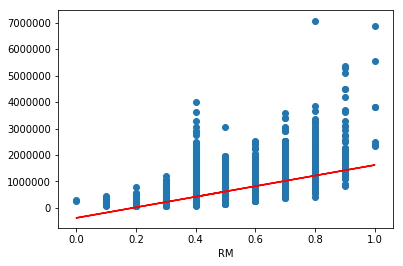

In [29]:
#PLOT

%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,5].reshape(-1,1)
linear_reg.fit(X_train_rm, y_train)
y_predict = linear_reg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

# Summary Linear Regression :

Train score: 0.662
Test score: 0.676

Best Paramenters of Linear Regression are :{'copy_X': True, 'fit_intercept': False, 'normalize': True}
Best cross-validation score: 0.66

Average cross-validation score: 0.658
 
From OLS results removed a few insignificant variables and ran the model again now we got better AIC and BIC values. We will consider only these variables are considering this new set of data through out the regression.




# 2. Ridge Regression

In [35]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

<IPython.core.display.Javascript object>


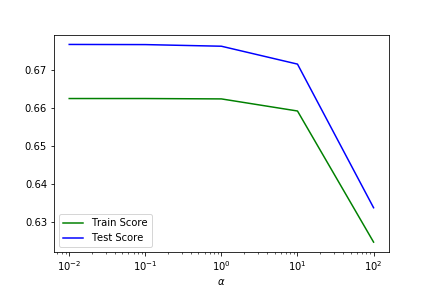

Text(0.5, 0, '$\\alpha$')

In [37]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [ ]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [38]:
print(train_score_list)
print(test_score_list)

[0.6625110159880787, 0.6625098343151745, 0.6624120540029739, 0.6592235217959475, 0.6246516871508705]
[0.6767729791211128, 0.6767338645857514, 0.6763032699807559, 0.6715863834688878, 0.6337169167746469]


In [39]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.6624
Test score: 0.6763


In [40]:
from sklearn.model_selection import GridSearchCV
model = Ridge()
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [41]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.66


In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(ridge , X_train, y_train, cv=kfold)))
scores = cross_val_score(ridge , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.63729699 0.68024386 0.64514425 0.66932979 0.63183216 0.68682467]
0.6584452876153396


# Summary of Ridge Regression :

Train score: 0.6624
Test score: 0.6763

Best parameters: {'alpha': 1}
Best cross-validation score: 0.66

Average cross-validation score: 0.658



# 3. Lasso Regression

In [43]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

<IPython.core.display.Javascript object>


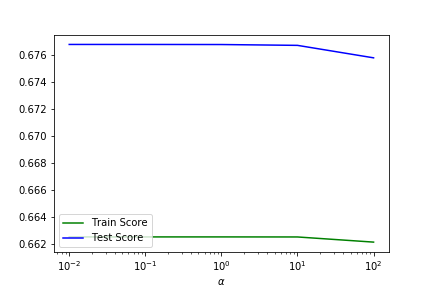

Text(0.5, 0, '$\\alpha$')

In [44]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [45]:
print(train_score_list)
print(test_score_list)

[0.6625110281665137, 0.6625110277848077, 0.662510989969891, 0.662507183482192, 0.6621254868290152]
[0.6767772012920983, 0.6767766115279308, 0.6767707343419131, 0.6767089121947476, 0.6757845942824553]


In [46]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.6625
Test score: 0.6768


In [47]:
from sklearn.model_selection import GridSearchCV
model = Lasso()
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [48]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.66


In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
 
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(lasso, X_train, y_train, cv=kfold)))
scores = cross_val_score(lasso , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.63780302 0.68034769 0.64450145 0.67018108 0.62976785 0.68776004]
0.6583935209229757


# Summary of Lasso Regression

Train score: 0.6625
Test score: 0.6768

Best parameters: {'alpha': 1}
Best cross-validation score: 0.66

Average cross-validation score: 0.658


# 4.KNN Regression

Text(0, 0.5, 'MSE')

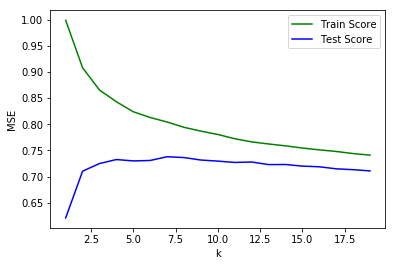

In [51]:
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [52]:
knn_reg = KNeighborsRegressor(4)
knn_reg.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn_reg.score(X_train, y_train)))
print('test score: {:.4f}'.format(knn_reg.score(X_test, y_test)))

Train score: 0.8429
test score: 0.7325


In [263]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsRegressor()
k_range = list(range(1, 21))
parameters = dict(n_neighbors=k_range)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [264]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 7}
Best cross-validation score: 0.52


In [265]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

knn  = KNeighborsRegressor(7)  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.69822197 0.73923404 0.75520341 0.72650655 0.70972415 0.70316451]
0.7220091045441305


# Summary for Knn Regression

Train score: 0.8429
test score: 0.7325
    
Normal Test score , Train Score Plot suggesting numbers of neighbors as 4  , but Grid search cv suggesting neigbors as 7.

Best parameters: {'n_neighbors': 7}

Avergae cross-validation score: 0.722



# 5 .Polynomial Regression

In [53]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    linear_reg.fit(X_train_poly, y_train)
    train_score_list.append(linear_reg.score(X_train_poly, y_train))
    test_score_list.append(linear_reg.score(X_test_poly, y_test))

In [54]:
print(train_score_list)
print(test_score_list)

[0.6625110281703768, 0.7933095639046525, 0.8730134764129932]
[0.676777266607381, 0.7811730831021085, -1.3842086588383308e+16]


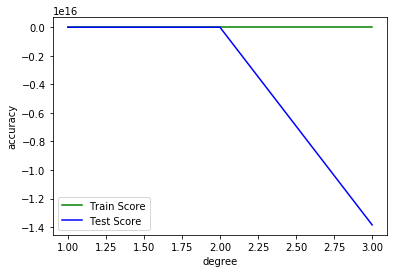

In [55]:
%matplotlib inline

x_axis = range(1,4)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

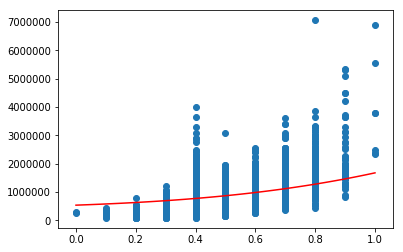

In [74]:
poly = PolynomialFeatures(n)
X_train_poly = poly.fit_transform(X_train_1)
linear_reg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = linear_reg.predict(x_poly)

X_train_1 = X_train[:,5].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

In [67]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)

X_poly = poly.fit_transform(X)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_poly, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [68]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Best cross-validation score: 0.76


In [69]:
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_copy_X,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.089057,0.024641,0.001318,0.000218,True,True,True,"{'copy_X': True, 'fit_intercept': True, 'norma...",0.751762,0.747612,...,0.020403,3,8.000512e-01,7.969324e-01,7.982173e-01,7.902855e-01,7.945853e-01,7.882025e-01,7.947124e-01,4.236894e-03
1,0.152908,0.070762,0.002375,0.000822,True,True,False,"{'copy_X': True, 'fit_intercept': True, 'norma...",0.751317,0.748445,...,0.020076,1,8.000005e-01,7.970359e-01,7.981694e-01,7.902368e-01,7.945657e-01,7.881191e-01,7.946879e-01,4.258994e-03
2,0.093151,0.028678,0.001471,0.000379,True,False,True,"{'copy_X': True, 'fit_intercept': False, 'norm...",0.751197,0.747164,...,0.020515,5,7.996219e-01,7.966347e-01,7.977268e-01,7.898546e-01,7.940653e-01,7.877374e-01,7.942735e-01,4.250421e-03
3,0.101531,0.083880,0.001414,0.000425,True,False,False,"{'copy_X': True, 'fit_intercept': False, 'norm...",0.751197,0.747164,...,0.020515,5,7.996219e-01,7.966347e-01,7.977268e-01,7.898546e-01,7.940653e-01,7.877374e-01,7.942735e-01,4.250421e-03
4,0.076436,0.010988,0.001248,0.000231,False,True,True,"{'copy_X': False, 'fit_intercept': True, 'norm...",0.751762,0.747612,...,0.020403,3,-7.872642e+09,-7.667672e+09,-8.915688e+09,-7.582510e+09,-9.419627e+09,-8.065430e+09,-8.253928e+09,6.797289e+08


In [72]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(linear_reg , X_train1, y_train1, cv=kfold)))
scores = cross_val_score(linear_reg , X_train1, y_train1, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.75131681 0.74844457 0.75434235 0.79537018 0.74898895 0.79078385]
0.7648744533109101


# summary for polynomial regression

Best Parameter : Degree = 2

Train score : 0.79
test score : 0.78

Best parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Best cross-validation score: 0.76

Average cross-validation score: 0.7648



# 6.Linear Svm

In [23]:
from sklearn.svm import SVR

train = []
test = []
index = []
for C in [0.1, 1, 10, 100,1000,10000,100000]:
        #create the model
        svr = SVR(kernel = 'linear', C = C)
        
        #train the model
        svr.fit(X_train, y_train)
        
        #evaluate the model
        train.append(svr.score(X_train, y_train))
        test.append(svr.score(X_test, y_test))
        index.append(C)

([<matplotlib.axis.XTick at 0x1a1a983fd0>,
 <a list of 7 Text xticklabel objects>)

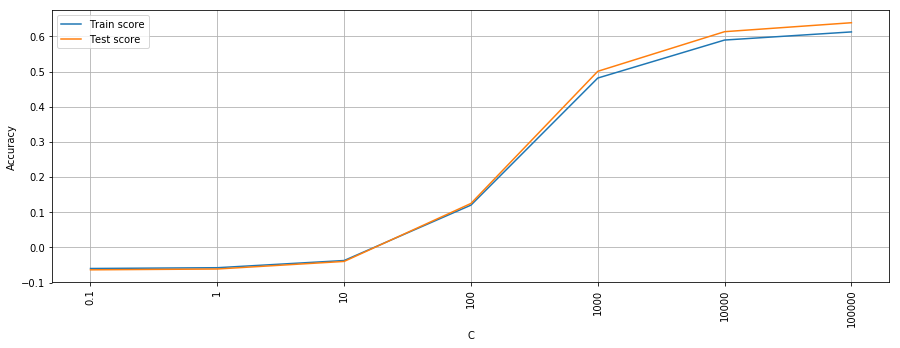

In [24]:
%matplotlib inline

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15,5))

plt.plot(range(len(index)), train, label = 'Train score')
plt.plot(range(len(index)), test, label = 'Test score')
plt.legend()
plt.grid()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xticks(range(len(index)), index, rotation = 90)

In [31]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear',C = 100000)
        
#train the model
svr.fit(X_train, y_train)
        
#evaluate the model
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

0.6171949622374415
0.6266243483475233


In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr , X_train, y_train, cv=kfold)))

scores = cross_val_score(svr , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.5785688  0.61751168 0.62978872 0.62292095 0.61039974 0.606879  ]
0.611011480323707


# Sumary Linear Svm

Train Score :0.617
Test Score : 0.626

Best parameters: {'C': 100000, 'kernel': 'linear'}

Average Cross-validation scores: 0.611

# 7.SVR with kernel

In [26]:
from sklearn.svm import SVR

train = []
test = []
index = []

for C in [0.1, 1, 10, 100 , 1000,10000]:
    for gamma in [0.1, 1, 10, 100,1000]:
        #create the model
        svr = SVR(kernel = 'rbf', C = C, gamma = gamma)
        
        #train the model
        svr.fit(X_train, y_train)
        
        #evaluate the model
        train.append(svr.score(X_train, y_train))
        test.append(svr.score(X_test, y_test))
        index.append((C,gamma))

([<matplotlib.axis.XTick at 0x104c98240>,
 <a list of 30 Text xticklabel objects>)

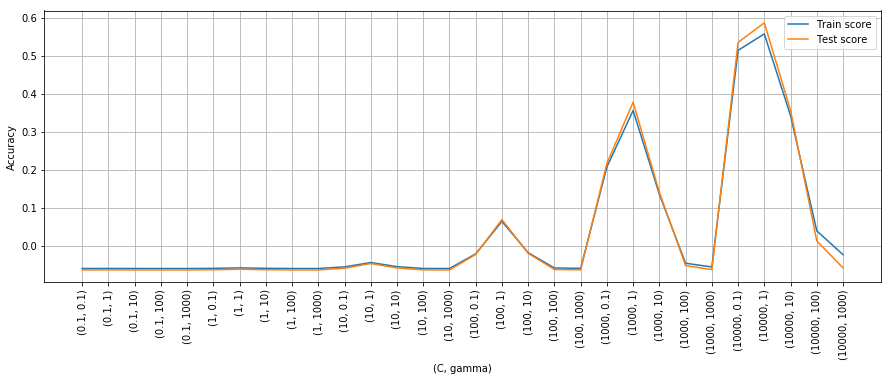

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15,5))

plt.plot(range(len(index)), train, label = 'Train score')
plt.plot(range(len(index)), test, label = 'Test score')
plt.legend()
plt.grid()
plt.xlabel('(C, gamma)')
plt.ylabel('Accuracy')
plt.xticks(range(len(index)), index, rotation = 90)

In [30]:
from sklearn.svm import SVR
#best parameters
svr = SVR(kernel = 'rbf', C = 10000, gamma = 1)
        
#train the model
svr.fit(X_train, y_train)
        
#evaluate the model
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

0.572342886010266
0.5595924265048641


In [32]:
from sklearn.model_selection import GridSearchCV
model = SVR()
parameters = param_grid = {'kernel':['rbf'],'C': [100,1000,10000],'gamma': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(model,parameters, cv=5,return_train_score=True,verbose=3)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=100, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=100, gamma=0.01, kernel=rbf, score=-0.06748238176838939, total=   5.9s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


[CV]  C=100, gamma=0.01, kernel=rbf, score=-0.08217121148573092, total=   5.4s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.6s remaining:    0.0s


[CV]  C=100, gamma=0.01, kernel=rbf, score=-0.04416747618956984, total=   6.3s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=-0.06261725687230735, total=   5.9s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV]  C=100, gamma=0.01, kernel=rbf, score=-0.048079887770323904, total=   5.6s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=-0.0674765165257929, total=   5.5s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=-0.08216970249780675, total=   5.4s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=-0.04417083162361557, total=   5.5s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=-0.06261609655928924, total=   5.6s
[CV] C=100, gamma=0.1, ke

[CV]  C=10000, gamma=10, kernel=rbf, score=-0.040984887004601456, total=   5.7s
[CV] C=10000, gamma=10, kernel=rbf ...................................
[CV]  C=10000, gamma=10, kernel=rbf, score=-0.06247828170235548, total=   6.8s
[CV] C=10000, gamma=10, kernel=rbf ...................................
[CV]  C=10000, gamma=10, kernel=rbf, score=-0.045333127305212884, total=   6.3s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  9.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['rbf'], 'C': [100, 1000, 10000], 'gamma': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [33]:
print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'C': 10000, 'gamma': 1, 'kernel': 'rbf'}


In [174]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(logreg, iris.data, iris.target)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr , X_train, y_train, cv=kfold)))
scores = cross_val_score(svr , X_train, y_train, cv=kfold)

print(np.mean(scores))


Cross-validation scores:
[0.53586149 0.60161155 0.63099894 0.51112223 0.55141632 0.52901802]
0.5600047582072443


# Summary Svm with kernel

Train Score:0.57
Test Score: 0.559

Best parameters: {'C': 10000, 'gamma': 1, 'kernel': 'rbf'}

Average Cross Validation Score : 0.56  

# SUMMARY OF REGRESSION MODELS

Polynomial regression with degree 2 gives the best average cross validation scores.


In [58]:
from  sklearn.preprocessing  import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
linear_reg.fit(X_train_poly, y_train)

ypred = linear_reg.predict(X_test_poly)

In [60]:
print(ypred)

[750198.01855469 212066.40234375 471863.28808594 ... 340071.
 276371.27246094 622369.91113281]
